In [87]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow import io
from matplotlib import pyplot as plt
import requests


In [88]:
# settings

save_folder = "../data/saved"
model_name = "effnetalpha"


In [89]:
model = load_model(f"{save_folder}/{model_name}")

In [90]:
print(list(model.signatures.keys()))

['serving_default']


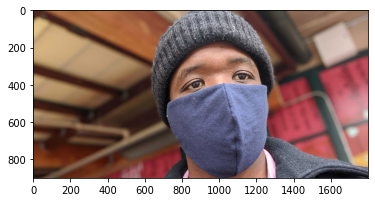

In [91]:



# response = requests.get("https://st.depositphotos.com/1491329/3629/i/600/depositphotos_36297389-stock-photo-beauty-portrait-beautiful-spa-woman.jpg")
#response = requests.get("https://www.statnews.com/wp-content/uploads/2020/06/AP_20098721818395-1600x900.jpg")
response = requests.get("https://venturebeat.com/wp-content/uploads/2020/04/facial-recognition-face-mask.jpg?w=1800&strip=all")
image = io.decode_image(response.content, channels = 3, expand_animations = False)
plt.imshow(image)
image = tf.expand_dims(image, axis=0)
image = tf.image.resize(image, (224, 224))

In [92]:
pred = model.predict(image)
if pred[0][0] > pred[0][1]:
    infer = "With Mask"
else:
    infer = "Without Mask"

print(infer)


With Mask
